In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### Data generation

The function below will generate the data points and requires these inputs:

<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 5000 </li> </ul>
    <li> <b>clusterDeviation</b>: The standard deviation of the clusters. The larger the number, the further the spacing of the data points within the clusters. </li>
    <ul> <li> Example: 1 </li> </ul>
</ul>

In [ ]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation,
                                cluster_std=clusterDeviation)

    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

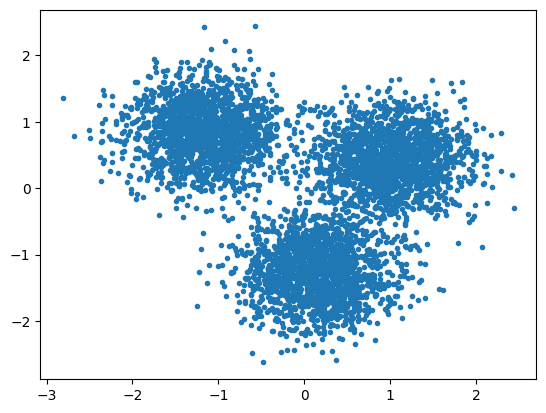

In [ ]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]], 5000, 1)

plt.scatter(X[:, 0], X[:, 1], marker='.')

#DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

is a powerful unsupervised machine learning algorithm used for clustering data points. Unlike k-means, which assumes clusters are spherical and requires you to specify the number of clusters beforehand, DBSCAN can discover clusters of arbitrary shapes and sizes. It's particularly well-suited for datasets with noise or outliers

**Key Concepts:**

1. **Density**: DBSCAN defines clusters as dense regions of points separated by sparser regions. It doesn't assume any specific shape for clusters.

2. **Core Points**: A point is a core point if it has at least a minimum number of points (specified by the min_samples parameter) within a certain radius (eps).

3. **Border Points**:  A point is a border point if it is not a core point but is within the eps distance of a core point.

4. **Noise Points**: Points that are neither core nor border points are considered noise.

**Key Points**
- DBSCAN is great for finding clusters of arbitrary shapes and identifying noise.
- The choice of epsilon and minimumSamples is crucial and might require some experimentation or tuning.
- This code provides a basic visualization; you can customize the plot aesthetics further (e.g., add titles, labels, legends) using Matplotlib functions.


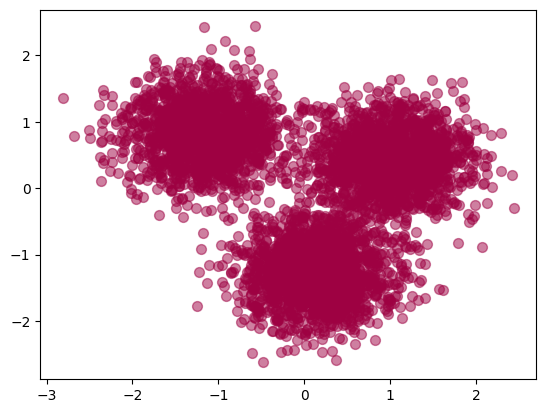

In [ ]:
epsilon = 0.5
minimumSamples = 20


db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_

# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_clusters_

# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
#unique_labels

# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

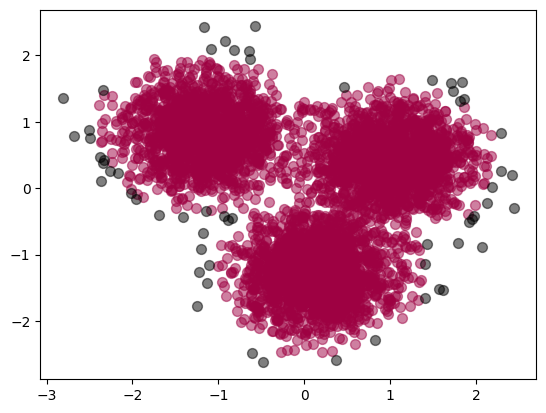

In [ ]:
epsilon = 0.3
minimumSamples = 40


db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_

# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_clusters_

# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
#unique_labels

# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

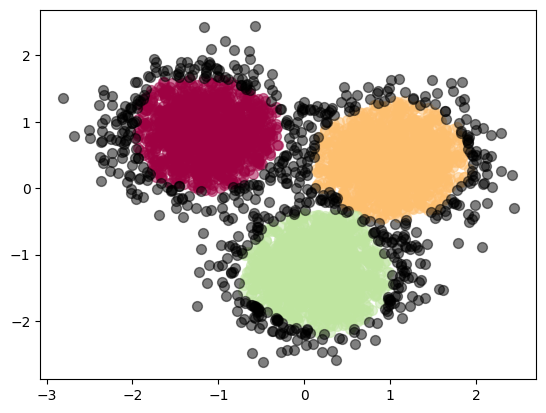

In [ ]:
epsilon = 0.2
minimumSamples = 50


db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_

# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_clusters_

# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
#unique_labels

# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

<ipython-input-101-759e5c81734f>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)


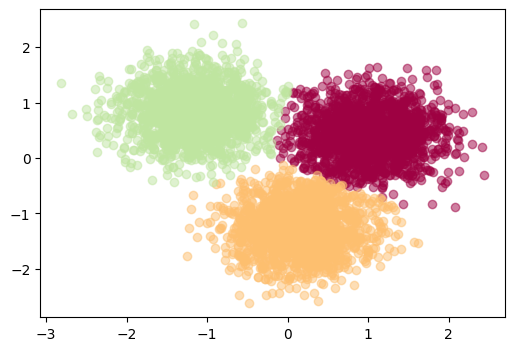

In [ ]:
from sklearn.cluster import KMeans
k = 3
k_means3 = KMeans(n_clusters = k, n_init = 10, random_state = 42)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()

<ipython-input-102-6ce89658d8bd>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)


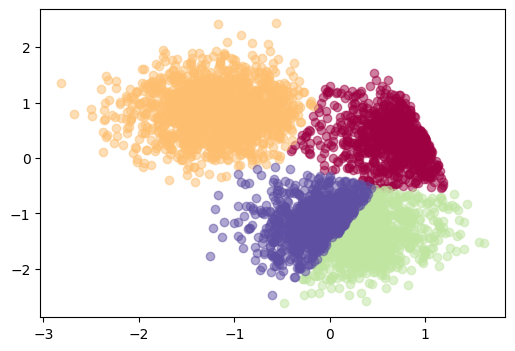

In [ ]:
from sklearn.cluster import KMeans
k = 5
k_means3 = KMeans(n_clusters = k, n_init = 10, random_state = 42)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()

**How DBSCAN Works:**

1. Start: The algorithm starts with an arbitrary point in the dataset.

2. Neighborhood Search: It checks if the point is a core point by counting the number of points within the eps radius. If it's a core point, it forms a new cluster.

3. Cluster Expansion: The algorithm then iteratively expands the cluster by checking the density around each neighbor of the core point. If a neighbor is a core point, it's added to the cluster. If it's a border point, it's still added but not used for further expansion.

4. Repeat: This process continues until no more points can be added to the cluster. Then, the algorithm moves to the next unvisited point and repeats the process to find another cluster.

5. Noise: Points that don't belong to any cluster are labeled as noise.

**Advantages of DBSCAN:**

1. Can find clusters of any shape: Unlike k-means, which assumes clusters are spherical, DBSCAN can find clusters of any shape, making it suitable for more complex datasets.
2. Handles noise: DBSCAN explicitly identifies and separates noise points from clusters, making it robust to outliers.
3. Doesn't require specifying the number of clusters (k): This is a significant advantage over k-means, as choosing the right k value can be challenging.


**Disadvantages of DBSCAN:**

1. Sensitive to parameters: The choice of eps and min_samples can significantly impact the results, and finding the right values might require some trial and error.
2. May struggle with varying densities: DBSCAN might have difficulty when clusters have varying densities.
3. Computationally expensive: For very large datasets, DBSCAN can be computationally expensive compared to k-means.
